## Exercise 4
### a) Exploration of the dataset and its preprocessing

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from IPython.display import display

# reading csv file
df = pd.read_csv(Path(r'../dataset/Credit.csv'))
display(df.head(3))
display(df.info())
display(df.describe())

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


None

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [2]:
# categorical data to numerical based on analysis above
cat_cols = ['Gender', 'Student', 'Married']
for col in cat_cols:
    df[col] = pd.get_dummies(df[col])
df.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.517500,0.900000,0.38750,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500319,0.300376,0.48779,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.00000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,1.000000,0.00000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,1.000000,1.000000,0.00000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000,1.000000,1.00000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1.000000,1.00000,1999.000000


In [3]:
# Part of c) but belongs to preprocessing
# Split Ethnicity to 3 variables
df = pd.get_dummies(df, columns=['Ethnicity'])
df.rename(columns={'Ethnicity_African American': 'Ethnicity_African'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           400 non-null    int64  
 1   Income               400 non-null    float64
 2   Limit                400 non-null    int64  
 3   Rating               400 non-null    int64  
 4   Cards                400 non-null    int64  
 5   Age                  400 non-null    int64  
 6   Education            400 non-null    int64  
 7   Gender               400 non-null    uint8  
 8   Student              400 non-null    uint8  
 9   Married              400 non-null    uint8  
 10  Balance              400 non-null    int64  
 11  Ethnicity_African    400 non-null    uint8  
 12  Ethnicity_Asian      400 non-null    uint8  
 13  Ethnicity_Caucasian  400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(6)
memory usage: 27.5 KB


### b) Separate dataset into training and test dataset
Use fixed random state to make results reproducible

In [4]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

### c) Linear Regression
The predicted variable is Balance.

The training dataset includes all other variables except for Limit.

Root Mean Squared Error (RMSE) of prediction and ground truth on test dataset is calculated below:

In [5]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
def rmse_ols(X_train, y_train, X_test, y_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    ols = sm.OLS(y_train, X_train).fit()
    y_pred = ols.predict(X_test)
    print('RMSE:', rmse(y_test, y_pred, axis=0))

rmse_ols(df_train.drop(['Limit', 'Balance'], axis=1), df_train[['Balance']],
          df_test.drop(['Limit', 'Balance'], axis=1), df_test['Balance'])

RMSE: 94.27789809716364


### d) Linear Regression without Ethnicity_Caucasian
The same result is shown. This means that the Ethnicity_Caucasian does *not* influence on the prediction

In [6]:
rmse_ols(df_train.drop(['Limit', 'Balance', 'Ethnicity_Caucasian'], axis=1), df_train[['Balance']],
          df_test.drop(['Limit', 'Balance', 'Ethnicity_Caucasian'], axis=1), df_test['Balance'])

RMSE: 94.2778980971637


### e) Coefficients, Confidence Intervals and Significance Levels
Coefficients, p-values, and confidence intervals
can be found under the column "conf", "P>|t|" and "[0.025" "0.975]"

> Coefficients indicate positive (sign +) or negative (sign -) correlation between each IV and DV

> P-value indicates whether relationship is significant e.g.
>1. p-value < significance level => reject null hypothesis => non-zero Corr. => IV stat significant
>2. p-value > significance level => insufficient evidence for non-zero Corr. => IV mot significant

>Confidence Intervals [0.025 and 0.975]
>coefficient values within 95% of our data.
>Outside these values can be considered outliers.

In [7]:
def print_stats(df_train, attr, label):
    X_train = df_train[attr]
    X_train = sm.add_constant(X_train)
    y_train = df_train[label]
    ols = sm.OLS(y_train, X_train).fit()
    print("Attributes", attr)
    print(ols.summary())
    print(ols.params)

attrs = [['Income', 'Limit', 'Age'],
         ['Income', 'Rating', 'Age'],
         ['Income', 'Limit', 'Rating', 'Age']]
for attr in attrs:
    print_stats(df_train, attr, ['Balance'])

Attributes ['Income', 'Limit', 'Age']
                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     751.3
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          2.04e-143
Time:                        12:39:58   Log-Likelihood:                -2081.9
No. Observations:                 320   AIC:                             4172.
Df Residuals:                     316   BIC:                             4187.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3

Analysis:
1. In all summaries Age has p-value (0.301, 0.184, 0.233) > 0.05 (standard significant level)
> Consider removing Age. Keeping not statistically significant can reduce the model’s precision
2. Case ['Income', 'Limit', 'Age']:
> Income has a large negative correlation with the DV, whereby Limit small positive
3. Case ['Income', 'Rating', 'Age']:
> Income similar to the precious case. Rating has a large positive correlation with the DV
4. Case ['Income', 'Limit', 'Rating', 'Age']:
> Income and Rating similar to the previous case. p-value[Limit] > 0.05 -> not significant.

### f) Correlation
>Correlation: statistical dependence of two random variables (NB: Correlation != Causality) <br>

1. Pearson Correlation assumptions
    1. linear relationship of data
    2. data is interval or ratio
    3. normal distribution of data
    4. (absence of outliers)

2. Spearsman Correlation: a non-parametric test, i.e. the same as Pearson, but
    1. data can be ordinal
    2. no normal distribution is required

3. Kendall Correlation: similar to Spearsman, but
    1. more robust -> preferred by small samples or some outliers

Correlation between all variables in dataset

In [10]:
for method in ['pearson', 'spearman', 'kendall']:
    display(method + " correlation for all variables")
    display(df_train.corr(method=method).style.background_gradient(cmap='coolwarm'))

'pearson correlation for all variables'

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian
Unnamed: 0,1.000000,0.045863,0.049059,0.047139,-0.069954,0.047942,-0.035836,-0.129201,0.025349,-0.015488,0.032940,-0.045921,-0.094534,0.120502
Income,0.045863,1.000000,0.798062,0.798903,-0.033522,0.198804,-0.001965,-0.021170,0.048277,-0.008154,0.460596,0.051201,-0.058064,0.004136
Limit,0.049059,0.798062,1.000000,0.997078,-0.004643,0.119522,-0.005820,-0.018181,0.059015,0.016919,0.858774,0.026547,-0.056707,0.024683
Rating,0.047139,0.798903,0.997078,1.000000,0.036778,0.123910,-0.013836,-0.021688,0.057883,0.009296,0.858506,0.027870,-0.062743,0.028632
Cards,-0.069954,-0.033522,-0.004643,0.036778,1.000000,0.087044,-0.028589,-0.010935,0.017784,-0.010521,0.070052,0.004312,-0.007270,0.002365
Age,0.047942,0.198804,0.119522,0.123910,0.087044,1.000000,0.011717,0.015661,0.024853,0.053000,0.018632,0.092918,-0.070047,-0.022422
Education,-0.035836,-0.001965,-0.005820,-0.013836,-0.028589,0.011717,1.000000,-0.031170,-0.064361,-0.074801,-0.002079,0.026593,0.071676,-0.084128
Gender,-0.129201,-0.021170,-0.018181,-0.021688,-0.010935,0.015661,-0.031170,1.000000,-0.044651,0.012013,-0.012047,0.013499,-0.021216,0.006096
Student,0.025349,0.048277,0.059015,0.057883,0.017784,0.024853,-0.064361,-0.044651,1.000000,-0.040941,-0.218310,0.003302,-0.043256,0.033743
Married,-0.015488,-0.008154,0.016919,0.009296,-0.010521,0.053000,-0.074801,0.012013,-0.040941,1.000000,0.038246,0.133746,-0.110332,-0.024220


'spearman correlation for all variables'

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian
Unnamed: 0,1.000000,0.038726,0.056860,0.053486,-0.092754,0.040418,-0.032287,-0.128591,0.024876,-0.015566,0.047446,-0.046900,-0.093875,0.120807
Income,0.038726,1.000000,0.652125,0.647472,-0.052053,0.161880,-0.043567,0.017292,0.051924,0.004854,0.350521,0.028755,-0.078622,0.041306
Limit,0.056860,0.652125,1.000000,0.995727,0.004184,0.073456,-0.018229,-0.012318,0.035112,0.028914,0.888579,0.001422,-0.069438,0.057579
Rating,0.053486,0.647472,0.995727,1.000000,0.048895,0.076646,-0.029809,-0.016751,0.037285,0.018479,0.887531,0.005382,-0.075309,0.059068
Cards,-0.092754,-0.052053,0.004184,0.048895,1.000000,0.088977,-0.038452,-0.000243,0.014570,0.001354,0.065508,0.019353,-0.014399,-0.004831
Age,0.040418,0.161880,0.073456,0.076646,0.088977,1.000000,0.017832,0.023118,0.025224,0.054685,-0.002724,0.090745,-0.064700,-0.025039
Education,-0.032287,-0.043567,-0.018229,-0.029809,-0.038452,0.017832,1.000000,-0.031486,-0.066250,-0.065420,-0.000576,0.024451,0.062227,-0.074238
Gender,-0.128591,0.017292,-0.012318,-0.016751,-0.000243,0.023118,-0.031486,1.000000,-0.044651,0.012013,-0.010721,0.013499,-0.021216,0.006096
Student,0.024876,0.051924,0.035112,0.037285,0.014570,0.025224,-0.066250,-0.044651,1.000000,-0.040941,-0.211823,0.003302,-0.043256,0.033743
Married,-0.015566,0.004854,0.028914,0.018479,0.001354,0.054685,-0.065420,0.012013,-0.040941,1.000000,0.039052,0.133746,-0.110332,-0.024220


'kendall correlation for all variables'

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian
Unnamed: 0,1.000000,0.024432,0.038502,0.036496,-0.066074,0.028740,-0.022018,-0.105158,0.020342,-0.012730,0.033818,-0.038354,-0.076769,0.098792
Income,0.024432,1.000000,0.473940,0.470318,-0.038290,0.107730,-0.032011,0.014141,0.042462,0.003969,0.244994,0.023516,-0.064296,0.033779
Limit,0.038502,0.473940,1.000000,0.947537,0.002207,0.047211,-0.012703,-0.010074,0.028715,0.023647,0.717030,0.001163,-0.056788,0.047089
Rating,0.036496,0.470318,0.947537,1.000000,0.033842,0.049527,-0.020889,-0.013711,0.030519,0.015126,0.718629,0.004405,-0.061643,0.048349
Cards,-0.066074,-0.038290,0.002207,0.033842,1.000000,0.063921,-0.031272,-0.000218,0.013063,0.001214,0.049960,0.017351,-0.012910,-0.004332
Age,0.028740,0.107730,0.047211,0.049527,0.063921,1.000000,0.011026,0.019055,0.020791,0.045075,-0.002068,0.074798,-0.053331,-0.020639
Education,-0.022018,-0.032011,-0.012703,-0.020889,-0.031272,0.011026,1.000000,-0.026838,-0.056471,-0.055764,-0.000190,0.020842,0.053043,-0.063281
Gender,-0.105158,0.014141,-0.010074,-0.013711,-0.000218,0.019055,-0.026838,1.000000,-0.044651,0.012013,-0.008946,0.013499,-0.021216,0.006096
Student,0.020342,0.042462,0.028715,0.030519,0.013063,0.020791,-0.056471,-0.044651,1.000000,-0.040941,-0.176748,0.003302,-0.043256,0.033743
Married,-0.012730,0.003969,0.023647,0.015126,0.001214,0.045075,-0.055764,0.012013,-0.040941,1.000000,0.032586,0.133746,-0.110332,-0.024220


Observations for the dataset:
1. Strong (~>0.7) positive correlation by all metrics
    1. Rating and Limit
    2. Balance and Limit, Balance and Rating
2. Positive correlation between Balance and Income
3. Negative correlation between Ethnicity_Caucasian and {Ethnicity_Asian, Ethnicity_African}

### g) Random Forest Analysis

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def rf_stats(df_train, df_test, attr, label, random_state):
    X_train = df_train[attr]
    y_train = df_train[label]
    X_test = df_test[attr]
    y_test = df_test[label]
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train.values.ravel()) # values for numpy; ravel() for flattening
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse, rf.feature_importances_
random_states = [1, 33, 135, 123, 99, 11, 42, 0]
mse_l = []
fi_l = []
attrs_names = list(map(str, attrs))
for attr in attrs:
    mse_seeds = []
    fi_attr = []
    for i in range(len(random_states)):
        mse, fi = rf_stats(df_train, df_test, attr, ['Balance'], random_states[i])
        mse_seeds.append(mse)
        fi_attr.append(fi)
    mse_l.append(mse_seeds)
    fi_l.append(fi_attr)

df_mse = pd.DataFrame(dict(zip(attrs_names, mse_l)),
                      index=pd.Index(random_states, name='Random states'),
                      columns=pd.Index(attrs_names, name='MSE of attributes'))

MSE of different attributes with different random states

In [31]:
df_mse.style.background_gradient(cmap='coolwarm')
for i in range(len(df_mse.columns)):
    col = df_mse.columns.values[i]
    print(col)
    print("Mean = ", df_mse[col].mean(), "std = ", df_mse[col].std())

['Income', 'Limit', 'Age']
Mean =  31695.474871406248 std =  958.7513432758473
['Income', 'Rating', 'Age']
Mean =  27196.075485 std =  1181.8740538673526
['Income', 'Limit', 'Rating', 'Age']
Mean =  28389.224714687498 std =  464.4823312085513


Feature Importances

[0.1223823  0.85813116 0.01948654]
[0.12741655 0.85134307 0.02124038]
[0.110901   0.32663183 0.54642016 0.016047  ]


None

None

None

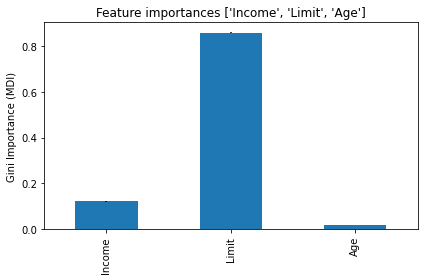

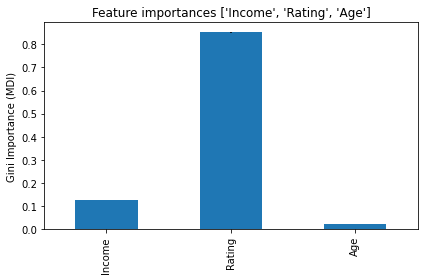

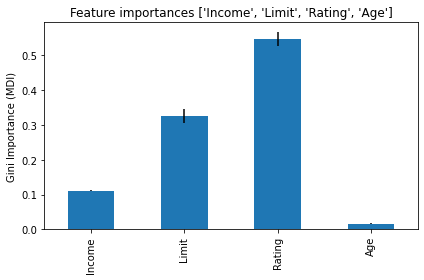

In [34]:
import matplotlib.pyplot as plt

def calculate_feature_importance(fi, feature_names):
    means = np.mean(fi, axis=0)
    std = np.std(fi, axis=0)
    print(means)
    model_importances = pd.Series(means, index=feature_names)
    fig, ax = plt.subplots()
    model_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances %s" % (str(feature_names)))
    ax.set_ylabel("Gini Importance (MDI)")
    display(fig.tight_layout())

fi_l = np.array(fi_l)
for i in range(len(attrs)):
    calculate_feature_importance(fi_l[i], attrs[i])

Observations:
1. Limit and Rating have the largest feature importance
2. Strong positive correlation between each other and for prediction has been also shown above in correlation analysis

### h) Multicollinearity
1. Multicollinearity: high correlations among two or more variables in a regression model
2. Result: wider confidence interval, thus, less reliable statistical results
3. Detection:
    1. Large changes in estimated coefficients by changing predictor variables
    2. Large values of pair correlations (~>0.7)
    3. Insignificant regression coefficients for the affected variables by multiple regression
4. Remedial measures:
    1. Drop some affected variables
    2. More data
    3. Rethink the model

## Garbage

In [ ]:
# b)
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()
#transformed = ohe.fit_transform(df[['Gender']])

In [ ]:
# b)
X = df.drop(['Limit', 'Balance'], axis=1)
y = df[['Balance']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X_train, y_train)

In [ ]:
y_pred = ols.predict(X_test)

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
X_train = X_train.drop(['Ethnicity_Caucasian'], axis=1)
X_test = X_test.drop(['Ethnicity_Caucasian'], axis=1)

In [ ]:
ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred = ols.predict(X_test)
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [38]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
def train_ols(X_train, y_train, X_test, y_test):
    ols = LinearRegression()
    ols.fit(X_train, y_train)
    print(ols.get_params())
    y_pred = ols.predict(X_test)
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

train_ols(df_train.drop(['Limit', 'Balance'], axis=1), df_train[['Balance']],
          df_test.drop(['Limit', 'Balance'], axis=1), df_test['Balance'])

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root Mean Squared Error: 94.27789809716373


### d) Linear Regression without Ethnicity_Caucasian

In [37]:
train_ols(df_train.drop(['Limit', 'Balance', 'Ethnicity_Caucasian'], axis=1), df_train[['Balance']],
          df_test.drop(['Limit', 'Balance', 'Ethnicity_Caucasian'], axis=1), df_test['Balance'])


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root Mean Squared Error: 94.27789809716377
